# Statistics with Python

Today we will 
* Import data into a pandas data frame
* Import some standard and useful libraries for python
* Introduce some model fitting


**Reference and Resource**

This lesson and data is adapted from 
<a href='https://www.linkedin.com/learning/python-statistics-essential-training/'>LinkedIn Learning: Python Statistics Essential Training</a>.  See these lessons for more details including working with categorical data.


## Importing Libraries and Data

In [1]:
# Load standard libraries for data analysis
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

import scipy.stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


In [2]:
# Have a question about a package?
# Get documentation with the question mark ?
# INSTRUCTIONS:  Ask about a library here:

?scipy.stats

## DESCRIBE AND PLOT DISTRIBUTIONS

For this, we will import some more librariers and a richer dataset from <a href="https://www.gapminder.org">GapMinder</a> 


In [3]:
# Import data
gapminder = pd.read_csv('gapminder.csv')

In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.00,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.00,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.00,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.00,647.0,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592.0,51.60,90.800,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.20,91.330,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.70,91.670,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.00,91.900,3.41,1773.0,4.854209


### Descriptive statistics

In [6]:
gapminder.population.max()

1376048943.0

In [7]:
gapminder.babies_per_woman.mean()

4.643471506105837

In [8]:
gapminder.babies_per_woman.var()

3.9793570162855287

In [9]:
gapminder.mean()

year                1.961688e+03
population          2.252933e+07
life_expectancy     5.683453e+01
age5_surviving      8.445267e+01
babies_per_woman    4.643472e+00
gdp_per_capita      9.000507e+03
gdp_per_day         2.464204e+01
dtype: float64

In [10]:
gapminder.age5_surviving.quantile([0.25,0.50,0.75])

0.25    75.18225
0.50    89.69300
0.75    96.87000
Name: age5_surviving, dtype: float64

Text(0, 0.5, 'Percentage Surviving')

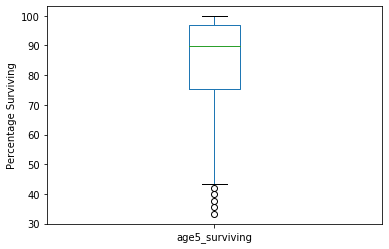

In [11]:
gapminder.age5_surviving.plot(kind='box')
pp.ylabel('Percentage Surviving')

### Hypothesis Testing

In [34]:
# 1 Sample t-test
# Is the mean of the data 84.4?
scipy.stats.ttest_1samp(gapminder['age5_surviving'], 84.4)

Ttest_1sampResult(statistic=0.4418141750395839, pvalue=0.6586301620721072)

In [43]:
# 2 sample t-test
gdata_us = gapminder[gapminder.country == 'United States']
gdata_canada = gapminder[gapminder.country == 'Canada']
gdata_us
gdata_canada
scipy.stats.ttest_ind(gdata_us.age5_surviving, gdata_canada.age5_surviving)   

Ttest_indResult(statistic=-0.3526754335897894, pvalue=0.7247959329454879)

## Fitting Models to Data

We have described the sample of a population with statistics.
Now lets understand what we can say about a population from a sample of data.

In [12]:
# Get data subset
gdata = gapminder.query('year == 1985')

In [13]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

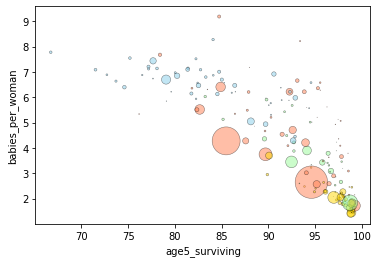

In [14]:
plotdata()

**statsmodels** has many capabilities.

Here we will use Ordinary Least Squares (OLS).
Least squares means models are fit by minimizing the squared difference between predictions and observations.

statsmodels lets us specify models using the "tilda" notation (also used in R)
response variable ~ model terms.  

For example: babes_per_woman ~ age5surviving

In [15]:
# Ordinary least squares model
model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)
#    where babies per woman is the response variable and
#    1 represents a constant

In [35]:
# Next, we fit the model
grandmean = model.fit()

In [40]:
# Interrogate the model
grandmean

In [18]:
# Let's make a function to plot the data against the model prediction
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata),
              c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

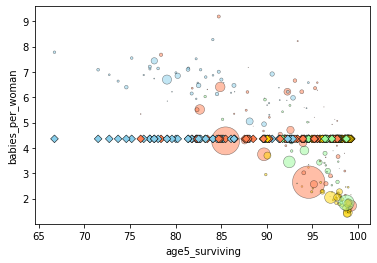

In [19]:
plotfit(grandmean)

In [20]:
grandmean.params

Intercept    4.360714
dtype: float64

In [21]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()

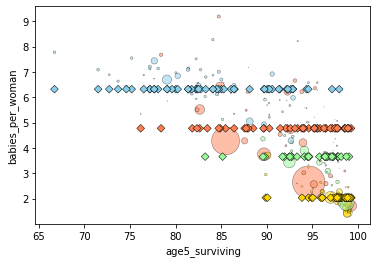

In [22]:
plotfit(groupmeans)

In [23]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving',data=gdata).fit()

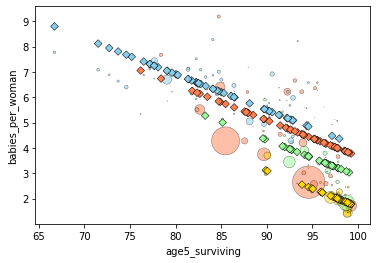

In [24]:
plotfit(surviving)

**statsmodels** provides a summary for the fit with Goodness of Fit statistics, and also provides an anova table for the significance of the added variables.

In [25]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           8.26e-56
Time:                        12:03:51   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
sm.stats.anova_lm(surviving)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN
